In [ ]:
import tensorflow
print(tensorflow.__version__)
!python --version

2.6.0
Python 3.7.11


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install fiftyone

     |████████████████████████████████| 1.1 MB 16.8 MB/s 
     |████████████████████████████████| 569 kB 54.0 MB/s 
     |████████████████████████████████| 79.9 MB 52 kB/s 
     |████████████████████████████████| 131 kB 52.6 MB/s 
     |████████████████████████████████| 29.2 MB 20 kB/s 
     |████████████████████████████████| 36.7 MB 62 kB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 557 kB 59.8 MB/s 
     |████████████████████████████████| 224 kB 50.6 MB/s 
     |████████████████████████████████| 13.2 MB 142 kB/s 
     |████████████████████████████████| 106 kB 63.8 MB/s 
     |████████████████████████████████| 77 kB 5.0 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
     |████████████████████████████████| 77 kB 5.2 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |█████████████████████████

## Available Datasets

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz

print(foz.list_zoo_datasets())

['bdd100k', 'caltech101', 'caltech256', 'cifar10', 'cifar100', 'cityscapes', 'coco-2014', 'coco-2017', 'fashion-mnist', 'hmdb51', 'imagenet-2012', 'imagenet-sample', 'kitti', 'lfw', 'mnist', 'open-images-v6', 'quickstart', 'quickstart-geo', 'quickstart-video', 'ucf101', 'voc-2007', 'voc-2012']


## Loading and visualization of Open-images-v6 dataset (Classification)

In [ ]:
# data for classification
dataset_cls = foz.load_zoo_dataset(
    "open-images-v6",
    dataset_dir = "/root/fiftyone/cls-open-images-v6", 
    split="validation",
    label_types=["classifications"],
    classes = ["Motorcycle", "Car"], 
    max_samples=20,
    seed=2021,
    shuffle=True,
    dataset_name="cls-open-images-v6"
)

 100% |████████████████████| 20/20 [3.8s elapsed, 0s remaining, 7.6 images/s]       
Dataset info written to '/root/fiftyone/cls-open-images-v6/info.json'
Loading 'open-images-v6' split 'validation'
 100% |███████████████████| 20/20 [204.0ms elapsed, 0s remaining, 98.1 samples/s]      
Dataset 'cls-open-images-v6' created


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


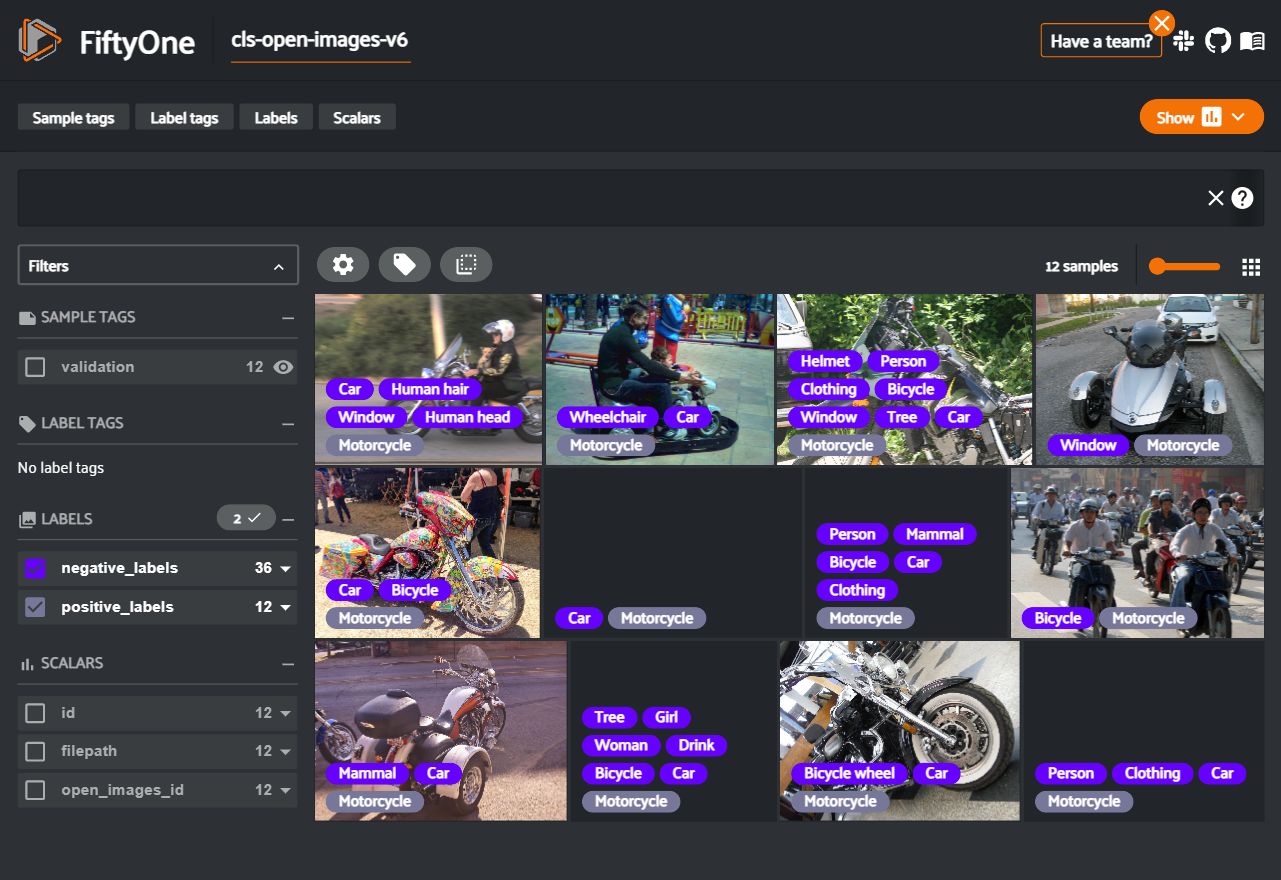

<IPython.core.display.Javascript object>

In [ ]:
session = fo.launch_app(dataset_cls)

## Selecting labels for viewing

In [ ]:
from fiftyone import ViewField as F

motor_cls = (
    dataset_cls.filter_labels("positive_labels",
        (F("label").is_in(["Motorcycle"]))))

car_cls = (
    dataset_cls.filter_labels("positive_labels",
        (F("label").is_in(["Car"]))))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


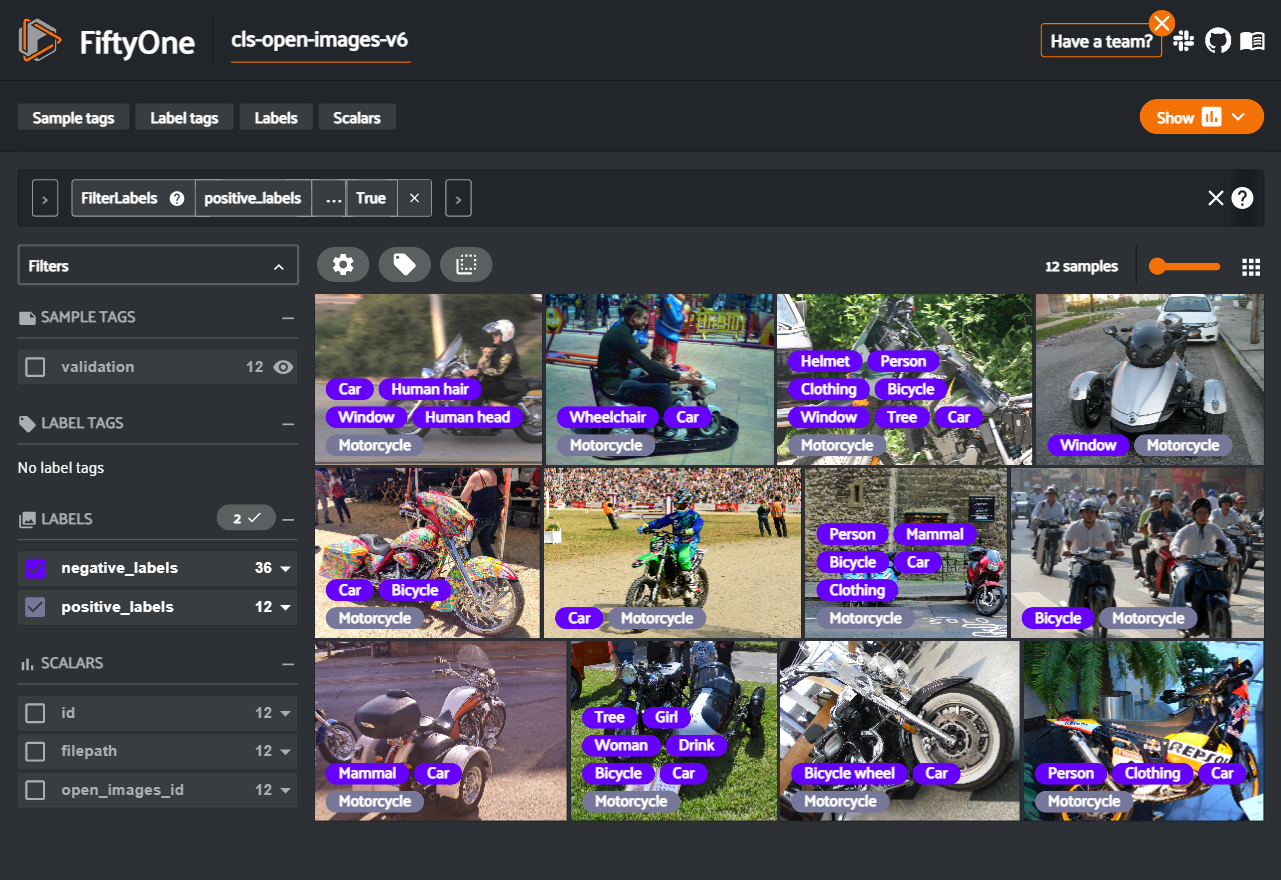

<IPython.core.display.Javascript object>

In [ ]:
session = fo.launch_app(view=motor_cls)

## Export data

In [ ]:
car_cls.export(
   export_dir="/content/gdrive/MyDrive/Colab/CV-TF1.X-2.X/openimagesv6/cls/car",
   dataset_type = fo.types.ImageDirectory,
)
motor_cls.export(
   export_dir="/content/gdrive/MyDrive/Colab/CV-TF1.X-2.X/openimagesv6/cls/motor",
   dataset_type = fo.types.ImageDirectory,
)

 100% |█████████████████████| 5/5 [81.8ms elapsed, 0s remaining, 61.1 samples/s] 
 100% |███████████████████| 12/12 [281.6ms elapsed, 0s remaining, 42.6 samples/s]     


## --------------------------------------------------------------------------------------------------------------------------------------------

## Loading and visualization of Open-images-v6 dataset (Detections)

In [ ]:
# data for detections
dataset_det = foz.load_zoo_dataset(
    "open-images-v6",
    dataset_dir = "/root/fiftyone/det-open-images-v6",  
    split="validation",
    label_types=["detections"],
    classes = ["Motorcycle", "Car"], 
    max_samples=20,
    dataset_name="det-open-images-v6"
)

 100% |████████████████████| 20/20 [3.8s elapsed, 0s remaining, 7.2 images/s]      
Dataset info written to '/root/fiftyone/det-open-images-v6/info.json'
Loading 'open-images-v6' split 'validation'
 100% |███████████████████| 20/20 [553.0ms elapsed, 0s remaining, 36.8 samples/s]      
Dataset 'det-open-images-v6' created


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


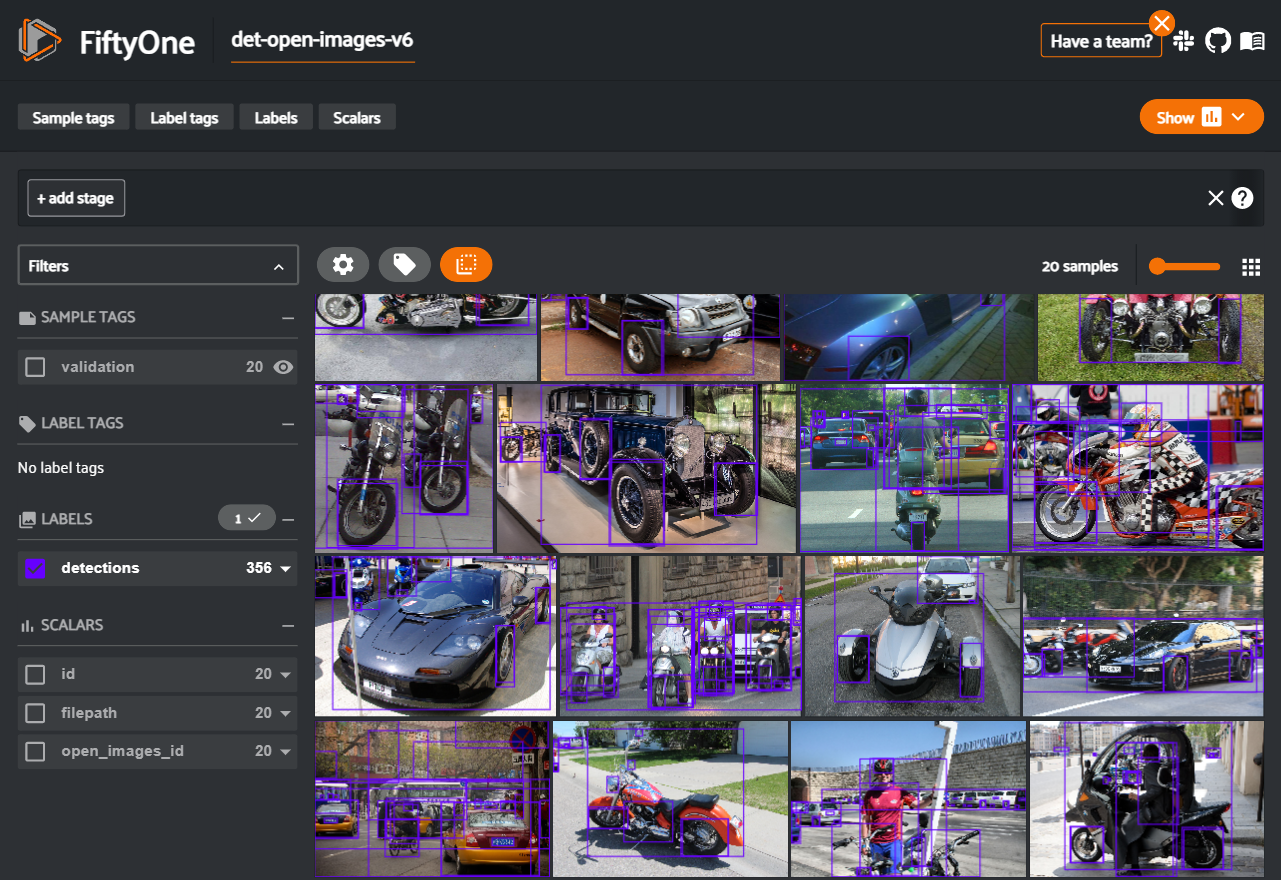

<IPython.core.display.Javascript object>

In [ ]:
session = fo.launch_app(dataset_det)

## Selecting labels for viewing

In [ ]:
from fiftyone import ViewField as F

motor_car_det = (
    dataset_det
    .filter_labels(
        "detections",
        (F("label").is_in(["Motorcycle", "Car"]))))

In [ ]:
session = fo.launch_app(view=motor_car_det)

## Exporting data

In [ ]:
#Yolov4 format
motor_car_det.export(
   export_dir="/content/gdrive/MyDrive/Colab/CV-TF1.X-2.X/openimagesv6/det/Yolov4/",
   dataset_type = fo.types.YOLOv4Dataset,
)


 100% |███████████████████| 20/20 [517.1ms elapsed, 0s remaining, 38.7 samples/s]      


In [ ]:
#TFRecords format
motor_car_det.export(
   export_dir="/content/gdrive/MyDrive/Colab/CV-TF1.X-2.X/openimagesv6/det/TFObjectDection/",
   dataset_type = fo.types.TFObjectDetectionDataset,
)

 100% |███████████████████| 20/20 [570.5ms elapsed, 0s remaining, 35.1 samples/s]      


## References:
- https://storage.googleapis.com/openimages/web/index.html
- https://voxel51.com/docs/fiftyone/tutorials/open_images.html
- https://voxel51.com/docs/fiftyone/user_guide/export_datasets.html